                            第六章  定积分

                            6.1 定积分的概念和性质

一、定积分的概念：定积分是积分的极限，用于计算函数在区间[a,b]上与x轴围城的面积的代数和。


数学表达式$$
\int_{a}^{b} f(x) \, dx = \lim_{\| λ \| \to 0} \sum_{i=1}^{n} f(ξ_i) \Delta x_i
$$


其中：$λ=max{(\Delta x_i)}$ 表示分割的最大小区间长度。

f(x) 在 [a,b] 上可积（需满足可积条件，如连续或有有限个间断点）。

2. 几何意义

    若 f(x)≥0，定积分表示曲边梯形的面积。

    若 f(x) 有正有负，定积分表示各部分面积的代数和。

3. 与不定积分的关系

    定积分是一个数值，而不定积分是函数族。

    牛顿-莱布尼茨公式（联系两者）
   $$
   \int_{a}^{b}f(x)dx = F(b)-F(a)
   $$

    其中：F(x)是f(x)的一个原函数

二、定积分的性质

1、基本性质

(1)线性性：
$$
\int_{a}^{b}[k_1f(x)+k_2g(x)]dx = k_1\int_{a}^{b}f(x)dx+k_2\int_{a}^{b}g(x)dx
$$

(2)区间可加性：
$$
\int_{a}^{b}f(x)dx = \int_{a}^{c}f(x)dx + \int_{c}^{b}f(x)dx        (a<c<b)
$$

(3)积分保号性：若f(x) ≥ 0且a < b，则
$$
\int_{a}^{b}f(x)dx ≥ 0
$$

(4)绝对可积性：
$$
| \int_{a}^{b}f(x)dx  | ≤ \int_{a}^{b} | f(x) | dx
$$

2、对称性（简化计算）

（1）f(x)为偶函数
$$
\int_{-a}^{a}f(x)dx = 2\int_{0}^{a}f(x)dx
$$

(2)f(x)为奇函数
$$
\int_{-a}^{a}f(x)dx = 0
$$

3、积分中值定理：若f(x)在[a,b]上连续，则存在ξ∈[a,b]，使得：
$$
\int_{a}^{b}f(x)dx = f(ξ)(b-a)
$$

几何意义：存在一个矩形，其面积等于曲边梯形的面积。

三、定积分计算

1、牛顿-莱布尼兹公式：若F(x)是f(x)的一个原函数，则：
$$
\int_{a}^{b}f(x)dx = F(x)|_{a}^{b} = F(b)-F(a)
$$

2、换元积分法：需要注意换元后的上下限对应调整。
$$
\int_{h(\alpha)}^{h(\beta)} f(x) \, dx = \int_{\alpha}^{\beta} f(h(u)) \cdot h'(u) \, du \quad (x = h(u))
$$

3、分部积分法：
$$
\int_{a}^{b} u(x) \cdot v'(x) \, dx = \left[ u(x) \cdot v(x) \right]_{a}^{b} - \int_{a}^{b} v(x) \cdot u'(x) \, dx
$$

四、注意事项

1、上下限顺序：
$$
\int_{a}^{b}f(x)dx = -\int_{b}^{a}f(x)dx
$$

2、积分存在性：若f(x)在[a,b]上连续或只有有限个第一类间断点，则定积分存在。

    **第一类间断点是指函数在某点处左极限和右极限均存在但不相等的间断点，或左、右极限存在且相等但与函数值不等的间断点。

3、符号处理：被积函数为负时，积分结果为负值，（我理解就是定积分保号性的推论）

【例6.1】按矩形法、梯形法和抛物线法计算定积分
$$
\int_{0}^{1}\frac {4}{1+x^2}dx
$$
的近似值(取n=10，计算时取5位小数)。

In [2]:
import numpy as np

# 定义被积函数（向量化）
def f(x):
    return 4 / (1 + x**2)

a = 0
b = 1
n = 10
h = (b - a) / n

# 生成节点 x_i (i=0,1,...,10) 和对应的函数值
x = np.linspace(a, b, n+1)
f_x = f(x)

# --------------------------
# 1. 矩形法（左端点法）
# --------------------------
rect_sum = np.sum(f_x[:-1])  # 左端点：前 n 个点（i=0~9）
rect_result = h * rect_sum

# --------------------------
# 2. 梯形法
# --------------------------
trap_sum = f_x[0] + f_x[-1] + 2 * np.sum(f_x[1:-1])  # 首尾项 + 中间项*2
trap_result = h * trap_sum / 2

# --------------------------
# 3. 辛普森法（抛物线法）
# --------------------------
sum_4 = np.sum(f_x[1:-1:2])  # 奇数项索引 1,3,5,7,9
sum_2 = np.sum(f_x[2:-1:2])  # 偶数项索引 2,4,6,8
simp_result = h/3 * (f_x[0] + 4*sum_4 + 2*sum_2 + f_x[-1])

# 精确值（π）
exact = np.pi

# 打印结果（保留5位小数）
print(f"矩形法（左端点）结果: {rect_result:.5f}")
print(f"梯形法结果        : {trap_result:.5f}")
print(f"辛普森法结果      : {simp_result:.5f}")
print(f"精确值 (π)       : {exact:.5f}")

矩形法（左端点）结果: 3.23993
梯形法结果        : 3.13993
辛普森法结果      : 3.14159
精确值 (π)       : 3.14159


作图展示三种方法的差异

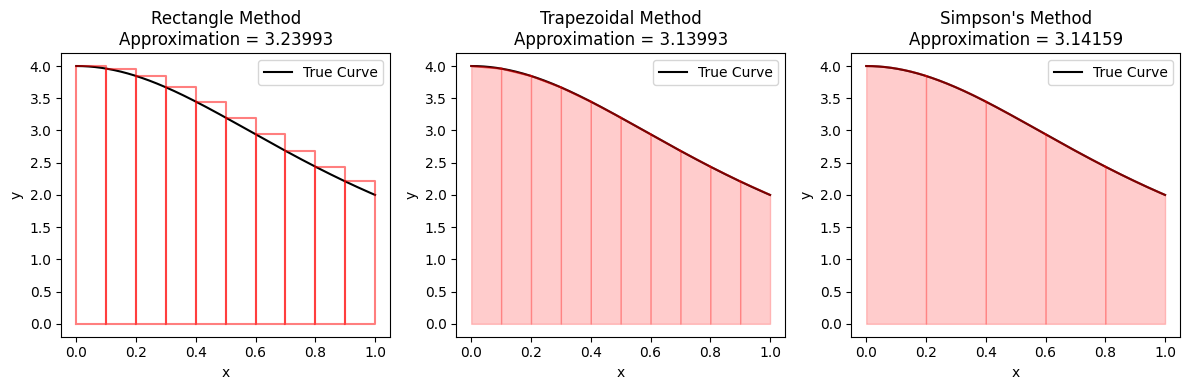

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 定义被积函数（向量化计算）
def f(x):
    return 4 / (1 + x**2)

a = 0      # 积分下限
b = 1      # 积分上限
n = 10     # 区间数量
h = (b - a) / n  # 步长

# 生成节点和函数值
x_nodes = np.linspace(a, b, n+1)  # 积分节点 (n+1个点)
x_dense = np.linspace(a, b, 1000) # 密集采样点用于绘制曲线
f_nodes = f(x_nodes)              # 节点处的函数值
f_dense = f(x_dense)              # 密集点的函数值

# --------------------------
# 1. 矩形法（左端点法）可视化
# --------------------------
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(x_dense, f_dense, 'k-', label='True Curve')  # 真实曲线

# 绘制矩形法近似区域
for i in range(n):
    xi = x_nodes[i]
    xi_next = x_nodes[i+1]
    plt.plot([xi, xi_next, xi_next, xi, xi],
             [0, 0, f(xi), f(xi), 0], 'r-', alpha=0.5)  # 红色矩形

plt.title(f'Rectangle Method\nApproximation = 3.23993')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# --------------------------
# 2. 梯形法可视化
# --------------------------
plt.subplot(1, 3, 2)
plt.plot(x_dense, f_dense, 'k-', label='True Curve')

# 绘制梯形法近似区域
for i in range(n):
    xi = x_nodes[i]
    xi_next = x_nodes[i+1]
    plt.plot([xi, xi_next], [f(xi), f(xi_next)], 'r-', alpha=0.5)  # 红色梯形边
    plt.fill_between([xi, xi_next], [f(xi), f(xi_next)], color='red', alpha=0.2)  # 填充区域

plt.title(f'Trapezoidal Method\nApproximation = 3.13993')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# --------------------------
# 3. 辛普森法（抛物线法）可视化
# --------------------------
plt.subplot(1, 3, 3)
plt.plot(x_dense, f_dense, 'k-', label='True Curve')

# 绘制辛普森法近似区域
for i in range(0, n, 2):  # 每两个子区间拟合一个抛物线
    x0 = x_nodes[i]
    x1 = x_nodes[i+1]
    x2 = x_nodes[i+2]

    # 生成抛物线采样点
    x_parabola = np.linspace(x0, x2, 100)

    # 二次插值公式
    f_parabola = (f(x0) * ((x_parabola - x1)*(x_parabola - x2)) / ((x0 - x1)*(x0 - x2)) +
                  f(x1) * ((x_parabola - x0)*(x_parabola - x2)) / ((x1 - x0)*(x1 - x2)) +
                  f(x2) * ((x_parabola - x0)*(x_parabola - x1)) / ((x2 - x0)*(x2 - x1)))

    plt.plot(x_parabola, f_parabola, 'r-', alpha=0.5)        # 红色抛物线
    plt.fill_between(x_parabola, f_parabola, color='red', alpha=0.2)  # 填充区域

plt.title(f"Simpson's Method\nApproximation = 3.14159")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# 调整布局并显示
plt.tight_layout()
plt.show()

图形解析

    1、矩形法（左端点）：

        每个小区间用左端点的高度作为矩形高度。

        红色矩形的顶部是水平的，与真实曲线（黑色）有明显偏差。

        近似值偏高（3.23993），误差较大。

    2、梯形法：

        每个小区间用左右端点的连线形成梯形。

        红色梯形的顶部是斜线，更接近真实曲线。

        近似值偏低（3.13993），误差比矩形法小。

    3、辛普森法：

        每两个小区间拟合一条抛物线（红色曲线），完全贴合真实曲线。

        近似值精确到五位小数（3.14159），与精确值 π 一致。

                            6.2 微积分基本公式

本节继续学习sympy.integrate()的使用方法

【例6.2】计算
$$
\int_{-2}^{-1}\frac {1}{x}dx
$$

In [1]:
import sympy as sp

x = sp.Symbol('x')
y = 1/x
result = sp.integrate(y,(x,-2,-1))
print(result)

-log(2)


积分公式计算：

1、由积分可知：
$$
\int\frac {1}{x}dx = ln |x| + C
$$

2、代入上下限。积分区间为[-2,-1]，因此：

$$
\int_{-2}^{-1}\frac {1}{x}dx = ln |x| |_{-2}^{-1} = ln |-1| - ln |-2| = 0 - ln2 = -ln2
$$

【例6.4】求
$$
\lim_{x \to 0} \frac{\int_{cosx}^{1} e^{-t^2} \, dt}{x^{2}}
$$

In [6]:
import sympy as sp
x = sp.Symbol('x')
t = sp.symbols('t')
result = sp.limit(sp.integrate(sp.E**(-t**2),(t,sp.cos(x),1))/(x**2),x,0)
print(result)

exp(-1)/2



手工计算的步骤：

步骤1：验证未定式类型
当 x→0 时：

积分下限 cosx→1，
积分值
$$
\int_{cosx}^{1} e^{-t^2}
 dt→0。
 $$
分母 x
2
 →0，因此极限为 ​0/0型未定式，适用洛必达法则。

步骤2：应用洛必达法则
对分子和分母分别求导：

(1)分子导数（变下限积分求导）：

$$
\frac {d}{dx}\int_{cosx}^{1} e^{-t^2}dt = -e^{-(cosx)^2}(-sinx) = e^{-cos^2x}sinx
$$

公式：若F(x) = \int_{a(x)}^{b(x)}f(t)dt，则

        F'(x) = f(b(x))*b'(x) - f(a(x))*a'(x)

此处b(x) = 1 ,故b'(x) = 0 ,仅保留下限贡献。

(2)分母导数：

 $$
        \frac {d}{dx}(x^2) = 2x
 $$
应用洛必达法则后，极限变为：

$$
\lim_{x\to 0}\frac {e^{-cos^2x}sinx}{2x}
$$

步骤3：等价无穷小替换

当x->0时，sinx ~ x ，因此：

$$
\frac {e^{-cosx^2x}sinx}{2x} ~ \frac {e^{-cos^2x}x}{2x} = \frac {e^{-cos^2x}}{2}
$$

步骤4：代入极限

x->0时，cosx->1,故：

$$
\lim_{x\to 0} \frac {e^{-cos^2x}}{2} = \frac {e^{-1}}{2} = \frac {1}{2e}
$$

In [1]:
from sympy import symbols, exp, Integral, cos, diff, limit, E, sqrt

# 定义符号变量
x, t = symbols('x t')

# 定义积分表达式
numerator = Integral(exp(-t**2), (t, cos(x), 1))
denominator = x**2

# 第一次应用洛必达法则
numerator_deriv1 = diff(numerator.doit(), x)  # 分子一阶导数
denominator_deriv1 = diff(denominator, x)    # 分母一阶导数
expr1 = numerator_deriv1 / denominator_deriv1

# 第二次应用洛必达法则
numerator_deriv2 = diff(numerator_deriv1, x)  # 分子二阶导数
denominator_deriv2 = diff(denominator_deriv1, x)  # 分母二阶导数
expr2 = numerator_deriv2 / denominator_deriv2

# 计算极限值
limit_result = limit(expr2, x, 0)

# 输出结果
print(f"最终极限值: {limit_result}")
print(f"化简后结果: {limit_result.simplify()}")
print(f"数值验证: {limit_result.evalf()}")
print(f"理论值 1/(2e): {1/(2 * E)}")

最终极限值: exp(-1)/2
化简后结果: exp(-1)/2
数值验证: 0.183939720585721
理论值 1/(2e): exp(-1)/2


                            6.3 定积分的换元法和分部积分

【例6.5】求
$$
\int_{0}^{a}\sqrt{a^2-x^2} dx (a>0)
$$

In [9]:
import sympy as sp

x = symbols('x')
a = sp.symbols('a',positive=True)
y = sp.sqrt(a**2-x**2)
result = sp.integrate(y,(x,0,a))
print(result)

pi*a**2/4


【例6.6】计算
$$
\int_{0}^{\pi}\sqrt{sin^3x-sin^5x}dx
$$

In [10]:
import sympy as sp

x = sp.symbols('x')
y = sqrt(sp.sin(x)**3-sp.sin(x)**5)
result = sp.integrate(y,(x,0,sp.pi))
print(result)

Integral(sqrt(-sin(x)**5 + sin(x)**3), (x, 0, pi))


这里的错误是因为被积分的函数在$【0，\pi】$需要考虑cos(x)的符号。
$$
\sqrt{sin^3x-sin^5x} = \sqrt{sin^3x(1-sin^2))} = sin^{3/2}x|cos(x)|
$$
分段积分

区间$[0,\pi/2]$:cos(x)≥0,表达式为sin^{3/2}x*cos(x)

区间$[\pi/2,\pi]$:cos(x)≤0,表达式为sin^{3/2}x*(-cos(x))

对称性简化：两部分积分结果相同，因此可简化积分为
$$
\int_{0}^{\pi}\sqrt{sin^3x-sin^5x}dx = 2\int_{0}^{\pi/2}sin^{3/2}x*cos(x)
$$

当函数分段，特别是存在符号问题时，一定要分段。

修改后的代码如下：

In [12]:
import sympy as sp

x = sp.symbols('x')

# 利用对称性，计算两倍0到π/2的积分
result = 2 * sp.integrate(sp.sin(x)**(3/2) * sp.cos(x), (x, 0, sp.pi/2))
print(result)  # 输出 4/5

0.800000000000000


【例6.7】计算
$$
\int_{0}^{4}\frac {x+2}{\sqrt{2x+1}}dx
$$

被积函数在[0,4]不存在分段问题，所以可以直接用integrate()

In [3]:
import sympy as sp

x = sp.symbols('x')
f = (x+2)/sp.sqrt(2*x+1)
result = sp.integrate(f, (x, 0, 4))
print(result)

22/3


【例6.8】计算
$$
\int_{-1}^{1}\ln(x+\sqrt{1+x^2})dx
$$

在[-1,1]之间存在分段问题，且该函数时奇函数，所以该函数在区间[-1,1]的定积分应该为0.

In [7]:
import numpy as np
from scipy.integrate import quad

# 定义被积函数（奇函数）
def integrand(x):
    return np.log(x + np.sqrt(x**2 + 1))

# 数值积分计算
val, err = quad(integrand, -1, 1)
result_rounded = np.round(val, 5)

# 输出结果
print(f"数值积分结果: {val:.15e}")
print(f"舍入到5位小数: {result_rounded}")
print(f"误差估计: {err:.5e}")

# 符号计算验证（使用 SymPy）
from sympy import symbols, integrate, log, sqrt, simplify

x_sym = symbols('x')
expr = log(x_sym + sqrt(x_sym**2 + 1))
symbolic_integral = integrate(expr, (x_sym, -1, 1))
print(f"\n符号计算结果: {simplify(symbolic_integral)}")

数值积分结果: 9.521101314285431e-18
舍入到5位小数: 0.0
误差估计: 1.03316e-14

符号计算结果: 0


分部积分：

In [6]:
import numpy as np
from sympy import symbols, log, sqrt, simplify

# 定义符号变量
x = symbols('x')

# 定义分部积分后的表达式
term1 = x * log(x + sqrt(x**2 + 1))  # uv 项
term2 = -sqrt(x**2 + 1)              # -∫v du 项
integral_expr = term1 + term2

# 代入上下限 x=1 和 x=-1
upper = integral_expr.subs(x, 1)
lower = integral_expr.subs(x, -1)
result = simplify(upper - lower)

print(f"分部积分法结果: {result}")

分部积分法结果: 0


【例6.9】计算
$$
\int_{0}^{3}\frac{x^2}{(x^2-3x+3)^2}dx
$$

In [10]:
import sympy as sp

x = sp.symbols('x')
y = x**2/(x**2-3*x+3)**2
result = sp.integrate(y, (x, 0, 3))
print(result)

1 + 8*sqrt(3)*pi/9


【例6.10】设函数
$$
f(x) =
\begin{cases}
\frac{1}{1 + \cos x} & -\pi < x < 0 \\
\\
x e^{-x^2} & x \geq 0
\end{cases}
$$
计算
$$
\int_{1}^{4}f(x-2)dx
$$

解： 令u = x-2，则积分变为：
$$
\int_{u=2}^{u=-1}f(u)du = \int_{-1}^{2}f(u)du
$$
根据f(u)的分段定义：

1、当$-π < u < 0时，f(u) = \frac {1}{1+cosu}$

2、当$u\geq0 时，f(u) = ue^{-u^2}$

积分拆分：
$$
\int_{-1}^{2}f(u)du =\int_{-1}^{0}\frac{1}{1+cosu}du + \int_{0}^{2}ue^{-u^2}du
$$


In [11]:
import sympy as sp

x = sp.symbols('x')
f_left =1/(1+cos(x))
f_right = x*pow(E,-x**2)
result = sp.integrate(f_left, (x, -1, 0)) + sp.integrate(f_right, (x, 0, 2))
print(result)

-exp(-4)/2 + 1/2 + tan(1/2)


书上的答案应该是有问题。

【例6.11】设
$$
I_n = \int_{0}^{\frac{\pi}{2}}sin^nxdx
$$由分部积分法可以推导出$I_n = \frac{n-1}{n}I_{n-2},编写代码求I_3及I_6。$

In [15]:
import numpy as np

# 定义递归函数
def I(n):
    if n == 0:
        return np.pi / 2
    elif n == 1:
        return 1.0
    else:
        return ((n-1)/n) * I(n-2)

# 计算 I₃ 和 I₆
I3 = I(3)
I6 = I(6)

print(f"I₃ = {I3:.6f}")  # 输出: 0.666667
print(f"I₆ = {I6:.6f}")  # 输出: 0.490874

I₃ = 0.666667
I₆ = 0.490874


符号计算验证：

In [16]:
import sympy as sp

x = sp.Symbol('x')
I3_sym = sp.integrate(sp.sin(x)**3, (x, 0, sp.pi/2))  # 输出: 2/3
I6_sym = sp.integrate(sp.sin(x)**6, (x, 0, sp.pi/2))  # 输出: 5π/32

print(f"I₃ = {I3_sym:.6f}")  # 输出: 0.666667
print(f"I₆ = {I6_sym:.6f}")  # 输出: 0.490874

I₃ = 0.666667
I₆ = 0.490874


                            6.4 反常积分

反常积分又称广义积分，是定积分的扩展，用于处理两类特殊积分问题，即

    1、积分区间无限（无穷积分）
    2、被积函数无界（瑕积分）。

In [ ]:
from sympy import *
from scipy.integrate import quad
from scipy import Infinity

【6.12】计算
$$
\int_{-oo}^{oo}\frac {1}{1+x^2}dx
$$

In [2]:
import sympy as sp
x = sp.Symbol('x')
f = 1/(1+x**2)
result = sp.integrate(f, (x, -sp.oo,sp.oo ))
print(result)

pi


进行了符号运算后，下面再看看科学计算怎么实现。

In [6]:
import numpy as np
from scipy.integrate import quad

result_num,error = quad(lambda x:1/(1+x**2),-np.inf,np.inf)
print(f"数值积分结果：{result_num:.6f}(误差：{error:.6f})")

数值积分结果：3.141593(误差：0.000000)


【6.13】计算反常积分
$$
\int_{0}^{oo}te^{-pt}dt
$$其中p是常数，且p > 0.

In [13]:
import sympy as sp
t = sp.Symbol('t')
p = sp.Symbol('p',positive=True)
f = t * sp.E ** (-p*t)
result = sp.integrate(f, (t, 0 ,sp.oo))
print(f"符号积分的结果：{result}")

符号积分的结果：p**(-2)


【例6.14】计算反常积分
$$
\int_{0}^{a} \frac {dx} {\sqrt{a^2-x^2}} (a>0)
$$

In [54]:
import sympy as sp

x, a = sp.symbols('x a', positive=True)  # 定义符号变量，a > 0
integral_expr = 1 / sp.sqrt(a**2 - x**2)
result = sp.integrate(integral_expr, (x, 0, a))  # 计算定积分
print(f"符号积分结果: {result}")

符号积分结果: pi/2


数值验证（SciPy）​

In [55]:
from scipy.integrate import quad
import numpy as np

a_val = 2.0  # 取a=2为例
def integrand(x):
    return 1 / np.sqrt(a_val**2 - x**2)

result_num, error = quad(integrand, 0, a_val - 1e-9)  # 避免x=a处的奇点
print(f"数值积分结果: {result_num} (理论值: {np.pi/2})")

数值积分结果: 1.5707963267354816 (理论值: 1.5707963267948966)


【例6.15】求反常积分
$$
\int_{-1}^{1}\frac{dx}{x^2}
$$

In [53]:
import sympy as sp
x = sp.Symbol('x')
f = 1/x**2
result = sp.integrate(f, (x, -1, 1))
print(result)

oo


【6.16】求反常积分
$$
\int_{0}^{oo}\frac{dx}{\sqrt{x(x+1)^3}}
$$

In [24]:
import sympy as sp
x = sp.Symbol('x')
f = 1 / sp.sqrt(x * (x + 1)**3)
result = sp.integrate(f, (x, 0, sp.oo))
print(f"符号积分的结果：{result}")

符号积分的结果：2


科学计算，数值验证：

In [25]:
from scipy.integrate import quad
import numpy as np

f = lambda x: 1 / np.sqrt(x * (x + 1)**3)
result_num, error = quad(f, 0, np.inf)
print(f"数值积分结果：{result_num} (误差：{error:.2e})")

数值积分结果：2.00000000000002 (误差：6.13e-14)


                            6.5 反常积分的审敛法Γ函数

本节仅讨论
$$
Γ(s) = \int_{0}^{oo}e^{-x}x^{s-1}dx(2s为正整数）的情况
$$下面继续学习递归函数的编写。

已知：(1)$Γ(\frac {1}{2}) = \sqrt{\pi}$

    (2)Γ(1) = 1

    (3)Γ(s)=(s-1)Γ(s-1)

In [30]:
from sympy import pi,sqrt
from math import floor

def Gamma(n):
    if floor(2*n)!=(2*n) or n < 0:
        print('参数 n 错误，2n必须为正整数')
        return
    if n == 1:return 1
    if n == 1/2:return sqrt(pi)
    return (n-1)*Gamma(n-1)
print(Gamma(1/2))
print(Gamma(1))
print(Gamma(2))

sqrt(pi)
1
1


                            6.6 极坐标系下绘图

首先要导入函数库，代码如下：

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

【例6.17】绘制r=1的图形

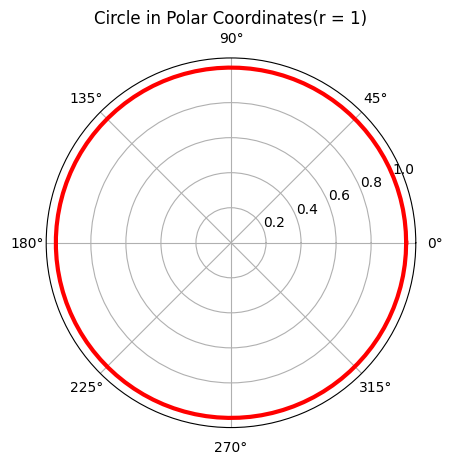

In [35]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2*np.pi, 100)
r = [1.0]*100
# polar()实现极坐标系下绘图
plt.polar(theta, r ,linewidth=3 ,color='red')
plt.grid(True)
plt.title("Circle in Polar Coordinates(r = 1)")
plt.show()

【例6.18】绘制$p = cosθ(\frac{-\pi}{2}\leq θ \leq\frac{\pi}{2})$

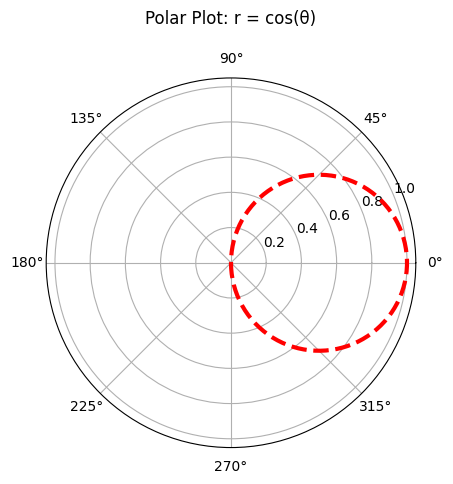

In [41]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(-np.pi/2, np.pi/2, 100)
r = np.cos(theta)
plt.polar(theta, r, '--', linewidth=3, color='red')
plt.grid(True)
plt.title("Polar Plot: r = cos(θ)", pad=20)  # 添加了pad使标题更清晰
plt.show()

【例6.19】绘制$$p = sinθ (0 \leq θ \leq\pi)$$

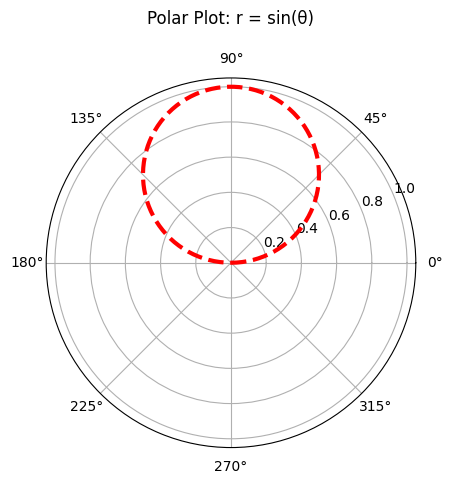

In [43]:
import numpy as np
import matplotlib.pyplot as plt
theta = np.linspace(0, np.pi, 100)
r = np.sin(theta)
plt.polar(theta, r, '--', linewidth=3, color='red')
plt.grid(True)
plt.title("Polar Plot: r = sin(θ)", pad=20)  # 添加了pad使标题更清晰
plt.show()

【例6.20】绘制阿基米德螺线 $p = aθ (0 \leq θ \leq 2\pi)$

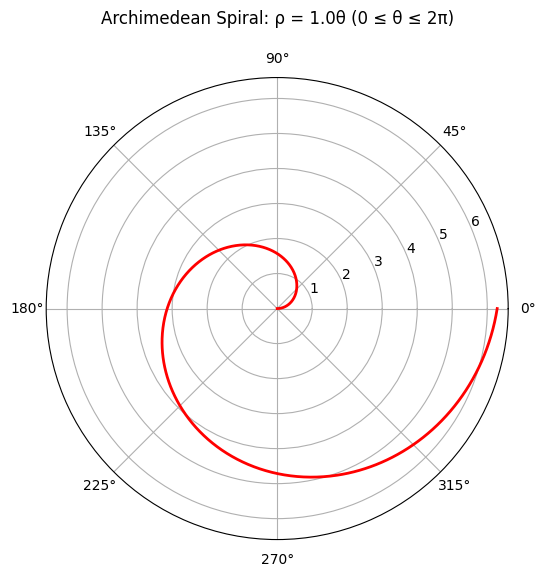

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
a = 1.0  # 螺线系数
theta = np.linspace(0, 2*np.pi, 1000)  # 角度范围 0 到 2π
rho = a * theta  # 极坐标方程 ρ = aθ

# 绘制极坐标图
plt.figure(figsize=(8, 6))
plt.polar(theta, rho, linewidth=2, color='red')

# 添加标题和标签
plt.title(f"Archimedean Spiral: ρ = {a}θ (0 ≤ θ ≤ 2π)", pad=20)
plt.grid(True)

plt.show()

【例6.21】绘制心形 $p = a(1+cosθ)  (a>0).$

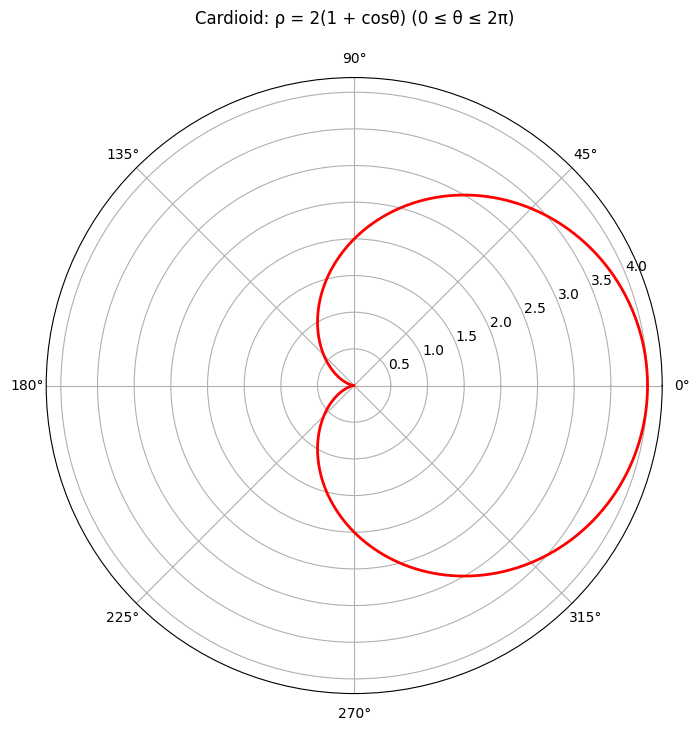

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
a = 2  # 心形线大小系数
theta = np.linspace(0, 2*np.pi, 1000)  # 角度范围 0 到 2π
rho = a * (1 + np.cos(theta))  # 极坐标方程 ρ = a(1 + cosθ)

# 绘制极坐标图
plt.figure(figsize=(8, 8))
plt.polar(theta, rho, linewidth=2, color='red')

# 添加标题和标签
plt.title(f"Cardioid: ρ = {a}(1 + cosθ) (0 ≤ θ ≤ 2π)", pad=20)
plt.grid(True)

plt.show()